In [77]:
import json
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


with open('../script/config_samples/benchmark_power_baseline.json') as fp:
    config_dict = json.load(fp)
    monitor_log_path = config_dict['monitor_log_path']
    monitor_log_filename = monitor_log_path.split('/')[-1]
    monitor_interval_ms = float(config_dict['monitor_interval'])

with open(f'../benchmark/{monitor_log_filename}') as fp:
    logs = json.loads(fp.read())
keys = [(res, flag) for res, res_log in logs[0].items() for flag, v in res_log.items()]
df = pd.DataFrame({(res, flag): [log[res][flag] for log in logs] for res, flag in keys})
df.index = monitor_interval_ms * np.arange(len(logs)) / 1000
df.index.name = 'Time (s)'
df.head()

cpu_freq                                      power_supply  \
         CUR_FREQ_LITTLE CUR_FREQ_BIG CUR_FREQ_PRIMARY CURRENT_NOW_charger   
Time (s)                                                                     
0.00             1708800      2419200          2841600                   1   
0.03             1478400      2419200          2841600                   1   
0.06             1708800      2419200          2841600                   1   
0.09             1555200      2419200          2841600                   1   
0.12             1785600      2323200          2841600                   1   

                                                                      \
         CURRENT_NOW_battery CURRENT_AVG_battery VOLTAGE_NOW_charger   
Time (s)                                                               
0.00                    -671                 -20                4143   
0.03                    -671                 -20                4143   
0.06                    -671                 -20                4143   
0.09                    -671                 -20                4143   
0.12                    -671                 -20                4143   

                                                  
         VOLTAGE_NOW_battery VOLTAGE_AVG_battery  
Time (s)                                          
0.00                    4075                4138  
0.03                    4075                4138  
0.06                    4075                4138  
0.09                    4075                4138  
0.12                    4075                4137

Text(0, 0.5, 'Power (W)')

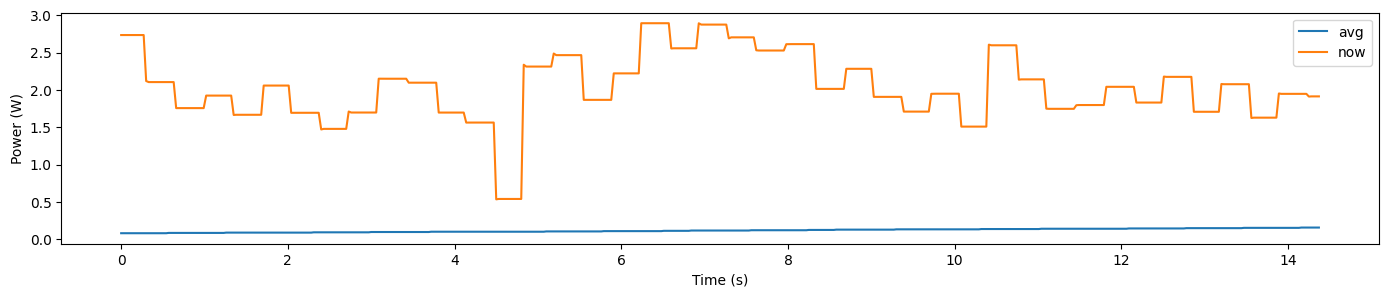

In [87]:
power_avg = - df['power_supply']['CURRENT_AVG_battery'] * df['power_supply']['VOLTAGE_AVG_battery'] / 1000 / 1000
power_now = - df['power_supply']['CURRENT_NOW_battery'] * df['power_supply']['VOLTAGE_NOW_battery'] / 1000 / 1000
plt.figure(figsize=(17, 3))
power_avg.plot(label='avg')
power_now.plot(label='now')
plt.legend()
plt.ylabel('Power (W)')